In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal, stats

In [44]:
gt = pd.read_csv("Polar_28.08_21.00.csv")["BPM"].to_numpy()
pred = pd.read_csv("Frequency_Arr_1_forehead.csv", sep=";")["Frequencies forehead"].to_numpy()

In [48]:
n_gt = gt[40:]
#n_gt = gt[25:-15]
#n_gt = gt[22:-18]
n_pred = pred[::2]

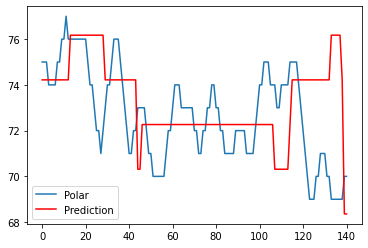

In [49]:
plt.plot(n_gt, label="Polar")
plt.plot(n_pred, c="r", label="Prediction")
plt.legend()

In [50]:
stats.pearsonr(n_gt, n_pred)

(0.14830189022876905, 0.07925418967298395)

In [51]:
stats.spearmanr(n_gt, n_pred)

SpearmanrResult(correlation=0.1575723938426169, pvalue=0.062029024811583684)

In [52]:
stats.kendalltau(n_gt, n_pred)

KendalltauResult(correlation=0.1239388191139893, pvalue=0.07065138398439724)

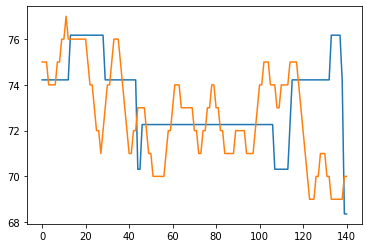

In [53]:
plt.plot(n_pred)
plt.plot(n_gt)

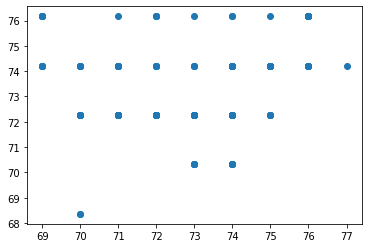

In [54]:
plt.scatter(n_gt,n_pred)

In [55]:
np.sqrt(np.mean(np.power(n_gt - n_pred, 2)))


2.5205799787328367

In [56]:
np.mean(np.abs(n_gt - n_pred))

1.8797650709219866

In [63]:
correlation=signal.correlate(gt,n_pred, mode='full')

In [64]:
n_correlation=correlation/correlation.max()

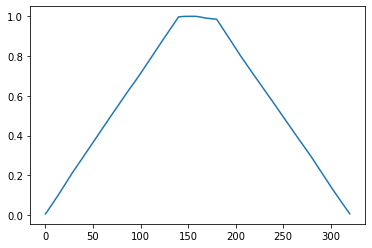

In [65]:
plt.plot(n_correlation)


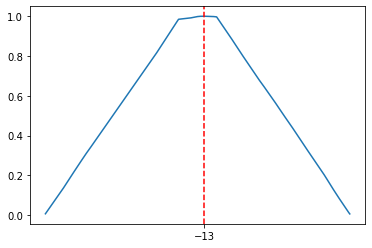

In [73]:
corr = signal.correlate(n_pred, gt, method="direct")
#lags = signal.correlation_lags(len(gt), len(pred))
lags=np.arange(-len(gt)+1,len(n_pred))

corr /= np.max(corr)
plt.plot(lags, corr)
lag_value = lags[np.argmax(corr)]
plt.axvline(lag_value, color="r", linestyle="--")
plt.xticks([lag_value])
plt.show()